In [2]:
import mcmc.simulation as s
import mcmc.plotting as p
import matplotlib.pyplot as plt
import numpy as np
import argparse
import parser_help as ph

In [3]:

sim = s.Simulation(n_layers=3,n_samples =1000,n =64,beta =1,num =2**8,
                    kappa =1e17,sigma_0 =5e6,sigma_v =1e2,sigma_scaling=1e-1,evaluation_interval =100,printProgress=True,
                    seed=1,burn_percentage =15,enable_beta_feedback=True,pcn_variant="dunlop",measurement_signal_type='smooth_discontinuous')
for i in range(sim.pcn.n_layers):
    print('Starting sqrt beta for Layer {0} is {1}'.format(i,sim.Layers[i].sqrt_beta))
sim.pcn.beta_feedback_gain = 2.1
sim.pcn_step_sqrtBetas = 3e-1
sim.pcn.stdev_sqrtBetas = 5e-2*sim.pcn.Layers_sqrtBetas
# sim.pcn.beta_feedback_gain = 3.15
sim.run()
sim.analyze()
p.plotResult(sim,include_history=True,useLaTeX=False,showFigures=False)
ratio = sim.pcn.sqrtBetas_history[0,0]/sim.sigma_0
sigmas_history = sim.pcn.sqrtBetas_history/ratio
sigma_scalling = (sigmas_history[-1,1]/sigmas_history[-1,-1])

Starting sqrt beta for Layer 0 is 10000000.0
Starting sqrt beta for Layer 1 is 20.000000000000004
Starting sqrt beta for Layer 2 is 200.00000000000003
Time Remaining 001-1 day(s),00:00:00- Acceptance Rate 6.80% - Progress: |██████████████████████████████████████████████████| 100.0% Complete
Iteration Completed in 001 day(s),00:00:17- Acceptance Rate 6.80% - Progress: |██████████████████████████████████████████████████| 100.0% Complete
Plotting complete


<Figure size 432x288 with 0 Axes>

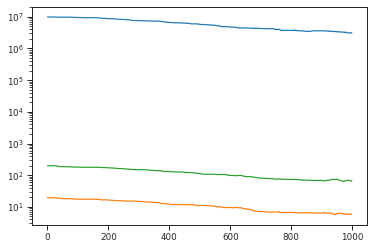

In [11]:
plt.semilogy(sim.pcn.sqrtBetas_history)

In [22]:
sim = s.Simulation(n_layers=3,n_samples =10000,n =64,beta =1,num =2**8,
                    kappa =1e17,sigma_0 =sigmas_history[-1,0],sigma_v =sigmas_history[-1,-1],sigma_scaling=sigma_scalling,evaluation_interval =100,printProgress=True,
                    seed=1,burn_percentage =15,enable_beta_feedback=True,pcn_variant="dunlop",measurement_signal_type='smooth_discontinuous')
for i in range(sim.pcn.n_layers):
    print('Starting sqrt beta for Layer {0} is {1}'.format(i,sim.Layers[i].sqrt_beta))
sim.pcn.beta_feedback_gain = 2.1
# sim.pcn.beta_feedback_gain = 3.15
sim.run()
sim.analyze()
p.plotResult(sim,include_history=True,useLaTeX=False,showFigures=False)
ratio = sim.pcn.sqrtBetas_history[0,0]/sim.sigma_0
sigmas_history = sim.pcn.sqrtBetas_history/ratio
sigma_scalling = (sigmas_history[-1,1]/sigmas_history[-1,-1])

Starting sqrt beta for Layer 0 is 57384.8547407564
Starting sqrt beta for Layer 1 is 0.1511712386532289
Starting sqrt beta for Layer 2 is 1.9340253331017978
Time Remaining 001-1 day(s),00:00:00- Acceptance Rate 22.84% - Progress: |██████████████████████████████████████████████████| 100.0% Complete
Iteration Completed in 001 day(s),00:03:02- Acceptance Rate 22.84% - Progress: |██████████████████████████████████████████████████| 100.0% Complete
Plotting complete


<Figure size 432x288 with 0 Axes>

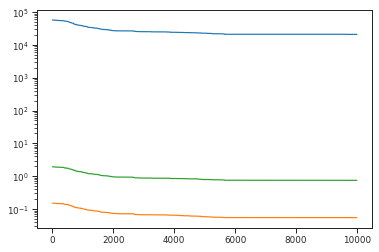

In [23]:
plt.semilogy(sim.pcn.sqrtBetas_history)
ratio = sim.pcn.sqrtBetas_history[0,0]/sim.sigma_0